In [6]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


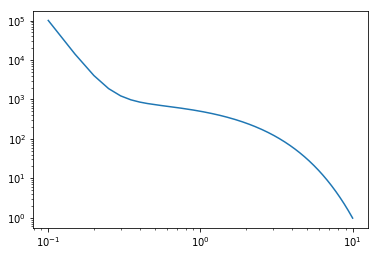

In [3]:
x = np.linspace(0.1,10,200)
fitfunc = lambda x, a1, i1, a2, i2: a1*(x**-i1) + a2*(i2**-x)
y = fitfunc(x, 1, 5, 1000, 2)
plt.loglog(x,y)
plt.show()

This is a very cool shape - and is similar to vacf.


G: -_-

In [27]:
x1,y1 = np.load("G_data/vcor_full.npy")

In [51]:
x,y,ye = np.load("G_data/vcor.npy")

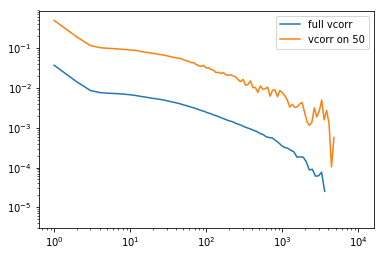

In [52]:
plt.loglog(x1,y1,'-',label='full vcorr')
plt.loglog(x,y,label='vcorr on 50')
plt.legend()

In [75]:
plaw = {'fitfun':lambda x, x0,a,b: b*(x-x0)**a,'p0': (-1,-.8,1e-2)}
plaw_noshift = {'fitfun':lambda x,a,b: b*(x)**a,'p0': (-.8,1e-2)}

def plot_fit(x,y,fitfun,p0):
    popt, pcov = curve_fit(fitfun, x, y,p0=p0)    # This works better in Jureca for some reason. 
    yopt = fitfun(x, *popt)
    plt.loglog(x,y)
    plt.loglog(x, yopt, c='k')
    perr = np.sqrt(np.diag(pcov))
    plt.grid(1)
    return {'popt':popt,'pcov':pcov,'perr':perr}

/home/astyonax/.anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


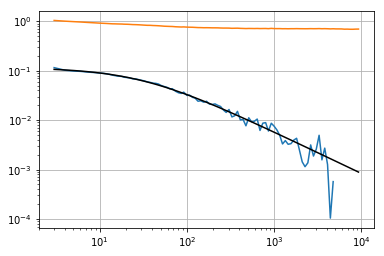

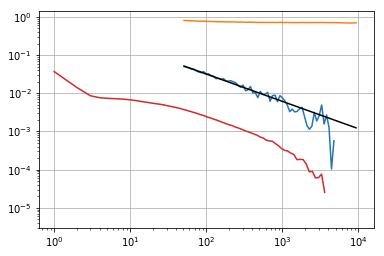

In [89]:
# plt.plot(x,y)
popt1 = plot_fit(x[2:],y[2:],**plaw)
plt.plot(x[2:],y[2:]+ye[2:])
plt.plot(x[2:],y[2:]-ye[2:])
plt.figure()
shift = 30
popt2 = plot_fit(x[shift:],y[shift:],**plaw_noshift)
plt.plot(x[shift:],y[shift:]+ye[shift:])
plt.plot(x[shift:],y[shift:]-ye[shift:])
plt.plot(x1,y1)

**Note that the std deviation (yellow line for y+y_std) is huge !**

In [85]:
print(popt2)

{'popt': array([-0.71645708,  0.8637507 ]), 'pcov': array([[ 0.00021788, -0.00086379],
       [-0.00086379,  0.00350126]]), 'perr': array([ 0.01476084,  0.05917146])}


In [86]:
print(popt1)

{'popt': array([-28.93031197,  -0.84363066,   1.97984103]), 'pcov': array([[  3.35197948e+00,   3.92438473e-02,  -4.25855842e-01],
       [  3.92438473e-02,   5.24402205e-04,  -5.48792299e-03],
       [ -4.25855842e-01,  -5.48792299e-03,   5.80434159e-02]]), 'perr': array([ 1.83084119,  0.02289983,  0.24092201])}
